# Описание проекта

Заказчиком является добывающая компания «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Имеются пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Требуется проанализировать возможную прибыль и риски техникой *Bootstrap.*

Алгоритм для выбора локации:

- в избранном регионе ищут месторождения, для каждого определяют значения признаков;
- строят модель и оценивают объём запасов;
- выбирают месторождения с самым высокими оценками значений - количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- прибыль равна суммарной прибыли отобранных месторождений.

### Содержание проекта:

<a href='#Этап 1'>1. Загрузка и подготовка данных</a>

<a href='#Этап 2'>2. Обучение и проверка модели</a>

<a href='#Этап 3'>3. Подготовка к расчёту прибыли</a>

<a href='#Этап 4'>4. Расчёт прибыли и рисков</a>

<a href='#Этап 5'>5. Общий вывод</a>

# 1. Загрузка и подготовка данных <a id='Этап 1'></a>

Импортируем библиотеку pandas для открытия датасетов в формате .csv и выводим общую информацию о них. Данные геологоразведки трёх регионов находятся в файлах <b>"geo_data_0.csv", "geo_data_1.csv", "geo_data_2.csv".</b>

Также импортируем модуль matplotlib.pyplot для отображения графиков. Из библиотеки scikit-learn импортируем структуры данных для обучения моделей по алгоритму линейной регрессии (по условию задачи подходит только он). Для разбиения данных на обучающую и валидационную выборки из библиотеки scikit-learn импортируем функцию train_test_split. Для расчёта средних квадратичноых ошибок моделей и их корней воспользуемся функцией mean_squared_error. Для рандомного изменения параметра random_state потребуется помощь библиотеки numpy.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')


print('\033[92m', '\033[7m', '\033[4m', 'Датасет по первому региону состоит из {} объектов и {} признаков'.
      format(len(data_0), len(data_0.columns)), '\033[0m', end='\n\n')

total_na = data_0.isna().sum().sort_values(ascending = False)
percent_of_na = (data_0.isna().sum() * 100 / data_0.isna().count()).sort_values(ascending=False)
missing_data_0 = pd.concat([total_na, percent_of_na], axis = 1, keys = ['Общее количество пропусков', 'Количество пропусков в %'])
for index in missing_data_0.index:
    missing_data_0.loc[index, 'Количество уникальных значений'] = data_0[index].value_counts().count()
missing_data_0['Количество уникальных значений'] = missing_data_0['Количество уникальных значений'].astype('int64')
missing_data_0['Тип данных'] = data_0[missing_data_0.index].dtypes
missing_data_0.index.name = 'Название признака'

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(missing_data_0.to_string(), end='\n\n')
    
print('\033[92m', '\033[7m', '\033[4m', 'Первые строки датасета по первому региону', 
      '\033[0m','\n\n', data_0.head(), end='\n\n')


print('\033[93m', '\033[7m', '\033[4m', 'Датасет по второму региону состоит из {} объектов и {} признаков'.
      format(len(data_1), len(data_1.columns)), '\033[0m', end='\n\n')

total_na = data_1.isna().sum().sort_values(ascending = False)
percent_of_na = (data_1.isna().sum() * 100 / data_1.isna().count()).sort_values(ascending=False)
missing_data_1 = pd.concat([total_na, percent_of_na], axis = 1, keys = ['Общее количество пропусков', 'Количество пропусков в %'])
for index in missing_data_1.index:
    missing_data_1.loc[index, 'Количество уникальных значений'] = data_1[index].value_counts().count()
missing_data_1['Количество уникальных значений'] = missing_data_1['Количество уникальных значений'].astype('int64')
missing_data_1['Тип данных'] = data_1[missing_data_1.index].dtypes
missing_data_1.index.name = 'Название признака'

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(missing_data_1.to_string(), end='\n\n')
    
print('\033[93m', '\033[7m', '\033[4m', 'Первые строки датасета по второму региону', 
      '\033[0m','\n\n', data_1.head(), end='\n\n')


print('\033[94m', '\033[7m', '\033[4m', 'Датасет по третьему региону состоит из {} объектов и {} признаков'.
      format(len(data_2), len(data_2.columns)), '\033[0m', end='\n\n')

total_na = data_2.isna().sum().sort_values(ascending = False)
percent_of_na = (data_2.isna().sum() * 100 / data_2.isna().count()).sort_values(ascending=False)
missing_data_2 = pd.concat([total_na, percent_of_na], axis = 1, keys = ['Общее количество пропусков', 'Количество пропусков в %'])
for index in missing_data_2.index:
    missing_data_2.loc[index, 'Количество уникальных значений'] = data_2[index].value_counts().count()
missing_data_2['Количество уникальных значений'] = missing_data_2['Количество уникальных значений'].astype('int64')
missing_data_2['Тип данных'] = data_2[missing_data_2.index].dtypes
missing_data_2.index.name = 'Название признака'

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(missing_data_2.to_string(), end='\n\n')
    
print('\033[94m', '\033[7m', '\033[4m', 'Первые строки датасета по третьему региону', 
      '\033[0m','\n\n', data_2.head(), end='\n\n')

   Датасет по первому региону состоит из 100000 объектов и 5 признаков 

                   Общее количество пропусков  Количество пропусков в %  Количество уникальных значений Тип данных
Название признака                                                                                                 
product                                     0                       0.0                          100000    float64
f2                                          0                       0.0                          100000    float64
f1                                          0                       0.0                          100000    float64
f0                                          0                       0.0                          100000    float64
id                                          0                       0.0                           99990     object

   Первые строки датасета по первому региону  

       id        f0        f1        f2     product
0  txEyH  0.705745 -0

Все датасеты состоят из 100000 объектов и 5 признаков. Объектами являются скважины.

Ниже приведено краткое описание имеющихся признаков:

- <b>"product" — объём запасов, приходящихся на скважину в тыс. баррелей (целевой признак)</b>. Пропусков нет. В первом и третьем датасете 100000 уникальных значений, во втором - 12 (нужно проверить наличие дубликатов). Вещественный тип данных - переведем значения в баррели и изменим тип на целочисленный.

- "f2", "f1" и "f0" — три значимых характеристики скважин. Пропусков нет. Во всех датасетах по 100000 уникальных значений. Вещественный тип данных - т.к. неизвестно, что конкретно означают эти признаки (скорее всего фильтрационно-емкостные характеристики призабойной зоны скважины), тип данных останется без изменений.

- "id" — уникальный идентификатор скважины. Пропусков нет. Во втором и третьем датасете по 99996 уникальных значений, в первом - 99990 (нужно проверить наличие дубликатов). Строковый тип данных - изменять не нужно. Т.к. данный признак является присваиваемым и не несёт причинно-следственной связи с другими, удалим его из всех датасетов.

Сперва проверим наличие дубликатов в каждом датасете, затем удалим в них признак "id".

In [2]:
print('В первом, втором и третьем датасете количество полных дубликатов {}, {} и {} соответственно.'.format(
    data_0.duplicated().sum(), data_1.duplicated().sum(), data_2.duplicated().sum()))

data_0.drop(columns=['id'], inplace=True)
data_1.drop(columns=['id'], inplace=True)
data_2.drop(columns=['id'], inplace=True)

В первом, втором и третьем датасете количество полных дубликатов 0, 0 и 0 соответственно.


В признаке "product" переведем значения в баррели и изменим тип данных на целочисленный.

In [3]:
data_0['product'] = (data_0['product'] * 1000).astype('int64')
data_1['product'] = (data_1['product'] * 1000).astype('int64')
data_2['product'] = (data_2['product'] * 1000).astype('int64')

Посмотрим на уникальные значения объёмов запасов по скважинам во втором датасете (там их всего 12 на 100000 скважин, это странно).

In [4]:
data_1['product'].value_counts().sort_index()

0         8235
3179      8337
26953     8468
30132     8306
53906     8472
57085     8390
80859     8320
84038     8431
107813    8201
110992    8303
134766    8304
137945    8233
Name: product, dtype: int64

Интересное распределение. Возможно, модель, заполняющая значения запасов по скважинам, дала сбой.. 

Проанализируем количественные признаки, по которым будет проводиться обучение моделей, на предмет наличия корреляций с другими количественными признаками. При выявлении сильной корреляции один из признаков можно будет удалить.

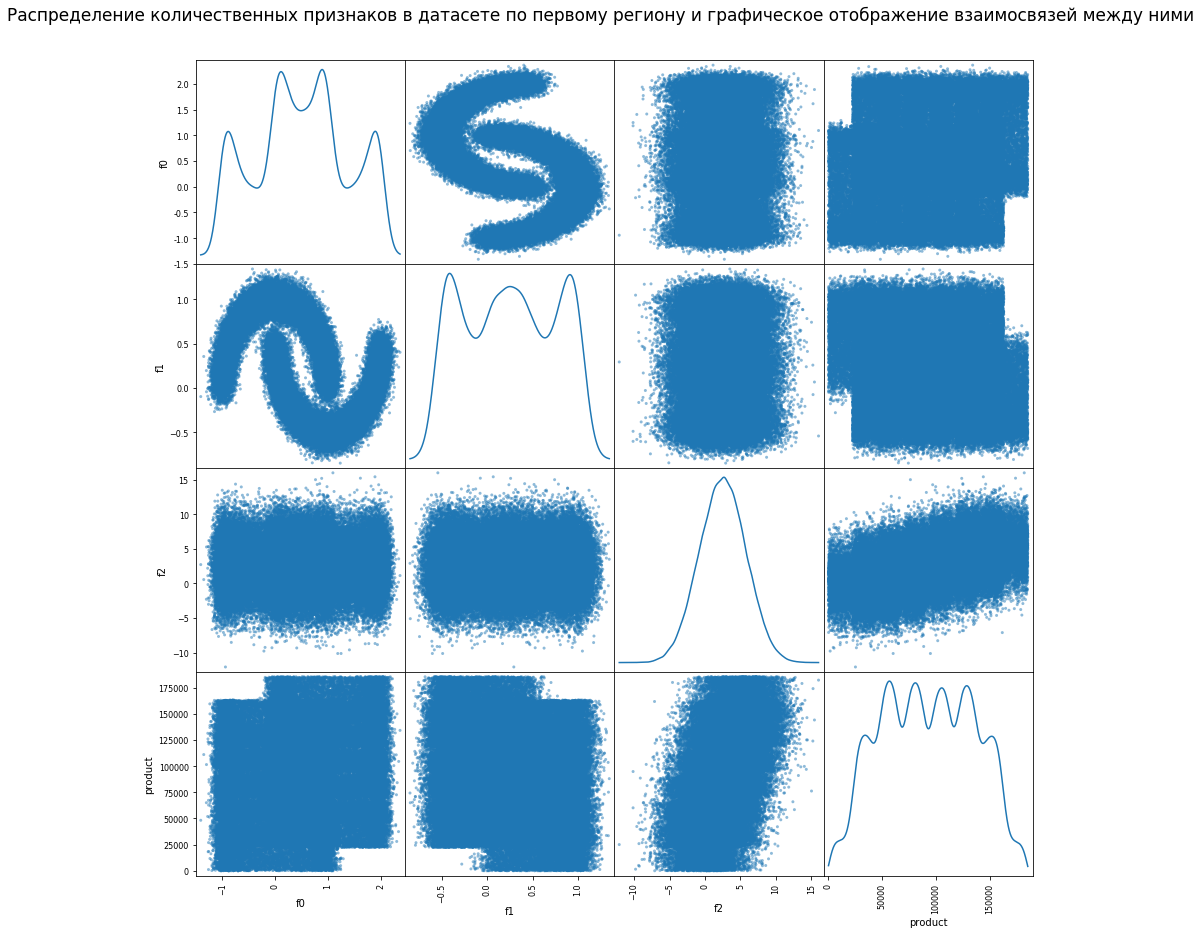

Диапазон значений по корреляции Пирсона в датасете по первому региону составляет -0.44072...0.48366

Диапазон значений по корреляции Спирмена в датасете по первому региону составляет -0.47139...0.48639



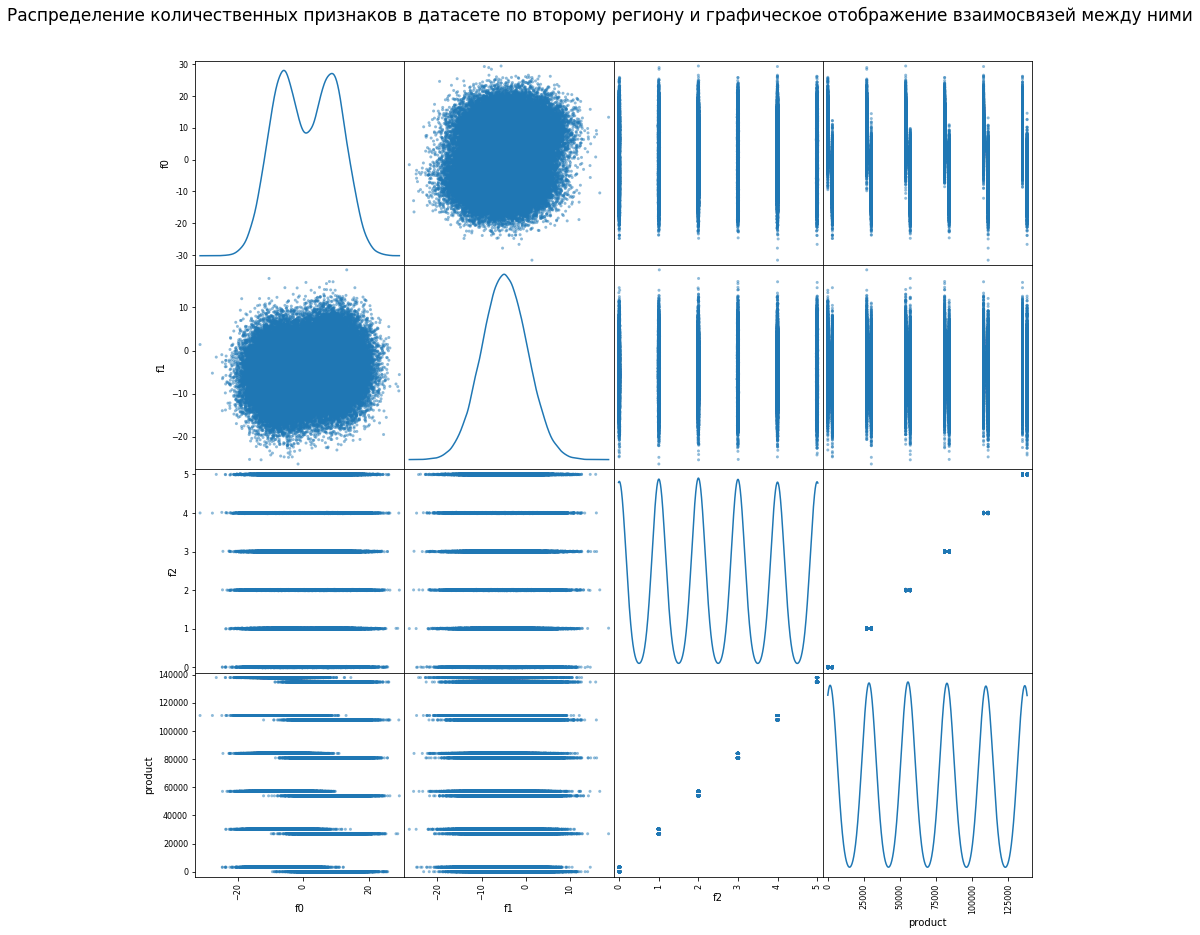

Диапазон значений по корреляции Пирсона в датасете по второму региону составляет -0.03049...0.99940

Диапазон значений по корреляции Спирмена в датасете по второму региону составляет -0.12287...0.97560



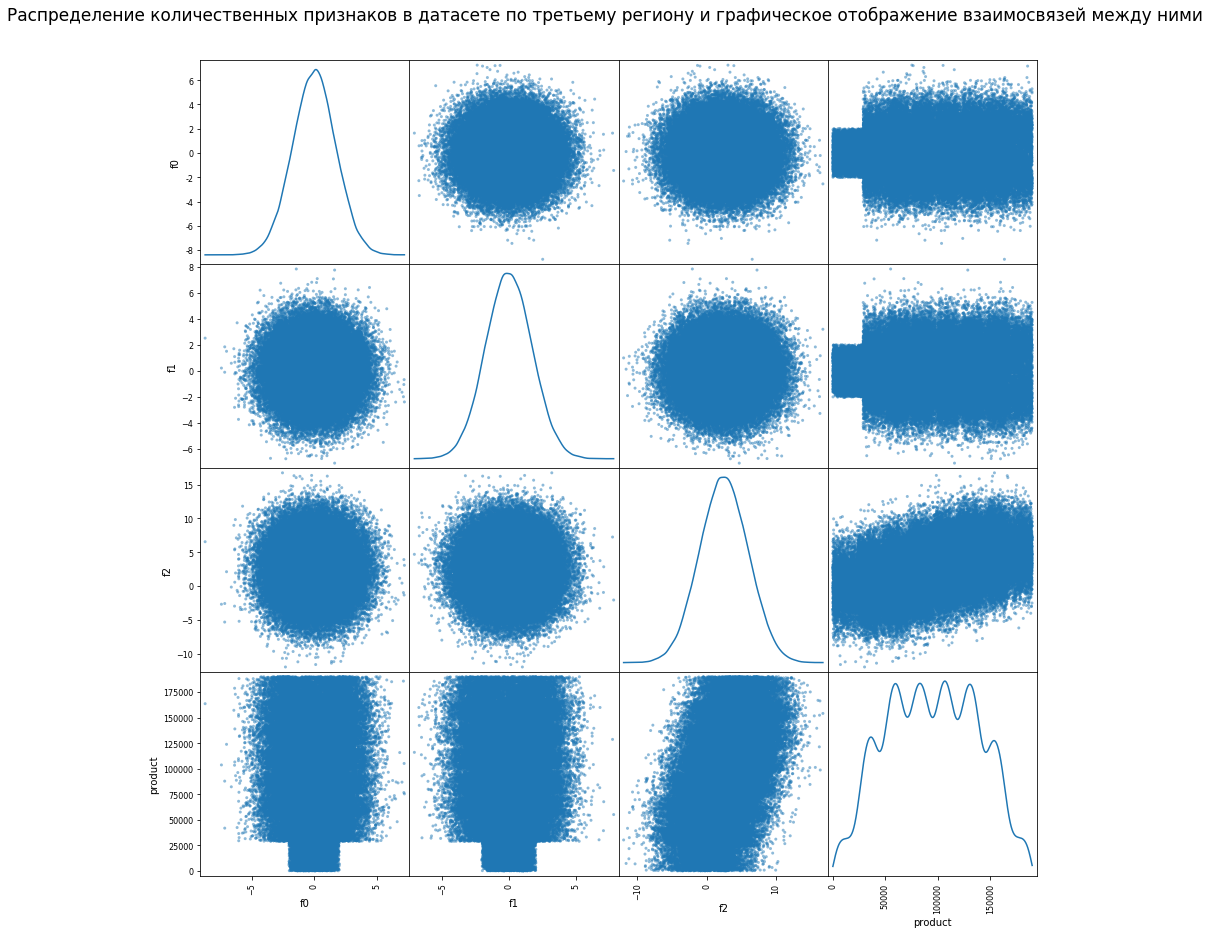

Диапазон значений по корреляции Пирсона в датасете по третьему региону составляет -0.00199...0.44587

Диапазон значений по корреляции Спирмена в датасете по третьему региону составляет -0.00246...0.44846



In [5]:
features_correlation_0 = pd.DataFrame(columns=['feature_1', 'feature_2', 'correlation_pearson', 'correlation_spearman'])

index = 0

for i in range(0, len(data_0.columns)):
    
    for a in range (i+1, len(data_0.columns)):
        features_correlation_0.loc[index, 'feature_1'] = data_0.columns[i]
        features_correlation_0.loc[index, 'feature_2'] = data_0.columns[a]
        features_correlation_0.loc[index, 'correlation_pearson'] = data_0[data_0.columns[i]].corr(data_0[data_0.columns[a]], method='pearson')
        features_correlation_0.loc[index, 'correlation_spearman'] = data_0[data_0.columns[i]].corr(data_0[data_0.columns[a]], method='spearman')
        index += 1

pd.plotting.scatter_matrix(data_0[data_0.columns], figsize=(15,15), alpha=0.5, diagonal='kde')
plt.suptitle('Распределение количественных признаков в датасете по первому региону и графическое отображение взаимосвязей между ними', fontsize=17, y=0.93)
plt.show()
                                                                                            
print('Диапазон значений по корреляции Пирсона в датасете по первому региону составляет {:.5f}...{:.5f}'.format(
    features_correlation_0['correlation_pearson'].min(), features_correlation_0['correlation_pearson'].max()
), end='\n\n')

print('Диапазон значений по корреляции Спирмена в датасете по первому региону составляет {:.5f}...{:.5f}'.format(
    features_correlation_0['correlation_spearman'].min(), features_correlation_0['correlation_spearman'].max()
), end='\n\n')



features_correlation_1 = pd.DataFrame(columns=['feature_1', 'feature_2', 'correlation_pearson', 'correlation_spearman'])

index = 0

for i in range(0, len(data_1.columns)):
    
    for a in range (i+1, len(data_1.columns)):
        features_correlation_1.loc[index, 'feature_1'] = data_1.columns[i]
        features_correlation_1.loc[index, 'feature_2'] = data_1.columns[a]
        features_correlation_1.loc[index, 'correlation_pearson'] = data_1[data_1.columns[i]].corr(data_1[data_1.columns[a]], method='pearson')
        features_correlation_1.loc[index, 'correlation_spearman'] = data_1[data_1.columns[i]].corr(data_1[data_1.columns[a]], method='spearman')
        index += 1

pd.plotting.scatter_matrix(data_1[data_1.columns], figsize=(15,15), alpha=0.5, diagonal='kde')
plt.suptitle('Распределение количественных признаков в датасете по второму региону и графическое отображение взаимосвязей между ними', fontsize=17, y=0.93)
plt.show()
                                                                                            
print('Диапазон значений по корреляции Пирсона в датасете по второму региону составляет {:.5f}...{:.5f}'.format(
    features_correlation_1['correlation_pearson'].min(), features_correlation_1['correlation_pearson'].max()
), end='\n\n')

print('Диапазон значений по корреляции Спирмена в датасете по второму региону составляет {:.5f}...{:.5f}'.format(
    features_correlation_1['correlation_spearman'].min(), features_correlation_1['correlation_spearman'].max()
), end='\n\n')



features_correlation_2 = pd.DataFrame(columns=['feature_1', 'feature_2', 'correlation_pearson', 'correlation_spearman'])

index = 0

for i in range(0, len(data_2.columns)):
    
    for a in range (i+1, len(data_2.columns)):
        features_correlation_2.loc[index, 'feature_1'] = data_2.columns[i]
        features_correlation_2.loc[index, 'feature_2'] = data_2.columns[a]
        features_correlation_2.loc[index, 'correlation_pearson'] = data_2[data_2.columns[i]].corr(data_2[data_2.columns[a]], method='pearson')
        features_correlation_2.loc[index, 'correlation_spearman'] = data_2[data_2.columns[i]].corr(data_2[data_2.columns[a]], method='spearman')
        index += 1

pd.plotting.scatter_matrix(data_2[data_2.columns], figsize=(15,15), alpha=0.5, diagonal='kde')
plt.suptitle('Распределение количественных признаков в датасете по третьему региону и графическое отображение взаимосвязей между ними', fontsize=17, y=0.93)
plt.show()
                                                                                            
print('Диапазон значений по корреляции Пирсона в датасете по третьему региону составляет {:.5f}...{:.5f}'.format(
    features_correlation_2['correlation_pearson'].min(), features_correlation_2['correlation_pearson'].max()
), end='\n\n')

print('Диапазон значений по корреляции Спирмена в датасете по третьему региону составляет {:.5f}...{:.5f}'.format(
    features_correlation_2['correlation_spearman'].min(), features_correlation_2['correlation_spearman'].max()
), end='\n\n')

В первом и третьем датасетах сильных линейных корреляций не обнаружено. Во втором датасете они есть - проверим, между какими признаками они выявлены. 

In [6]:
features_correlation_1

,feature_1,feature_2,correlation_pearson,correlation_spearman
0,f0,f1,0.182287,0.182248
1,f0,f2,-0.00177704,-0.00200008
2,f0,product,-0.0304896,-0.122869
3,f1,f2,-0.00259532,-0.00367772
4,f1,product,-0.0101547,-0.0339083
5,f2,product,0.999397,0.975605


Обнаружена утечка целевого признака - по признаку "f2" можно определить объём запасов по скважине. При этом уникальных значений целевого признака всего 12 и его рапределение сильно отличается от имеющихся в датасетах 1 и 3. По-хорошему, нужно удалить целевой признак, но тогда из-за отсутствия альтернативной информации по целевому признаку мы не сможешь обучить модель. Поэтому удаляем признак "f2".

In [7]:
data_1.drop(columns=['f2'], inplace=True)

print('\033[92m', '\033[7m', '\033[4m', 'Первые строки датасета по первому региону', 
      '\033[0m','\n\n', data_0.head(), end='\n\n')

print('\033[93m', '\033[7m', '\033[4m', 'Первые строки датасета по второму региону', 
      '\033[0m','\n\n', data_1.head(), end='\n\n')

print('\033[94m', '\033[7m', '\033[4m', 'Первые строки датасета по третьему региону', 
      '\033[0m','\n\n', data_2.head(), end='\n\n')

   Первые строки датасета по первому региону  

          f0        f1        f2  product
0  0.705745 -0.497823  1.221170   105280
1  1.334711 -0.340164  4.365080    73037
2  1.022732  0.151990  1.419926    85265
3 -0.032172  0.139033  2.978566   168620
4  1.988431  0.155413  4.751769   154036

   Первые строки датасета по второму региону  

           f0         f1  product
0 -15.001348  -8.276000     3179
1  14.272088  -3.475083    26953
2   6.263187  -5.948386   134766
3 -13.081196 -11.506057   137945
4  12.702195  -8.147433   134766

   Первые строки датасета по третьему региону  

          f0        f1        f2  product
0 -1.146987  0.963328 -0.828965    27758
1  0.262778  0.269839 -2.530187    56069
2  0.194587  0.289035 -5.586433    62871
3  2.236060 -0.553760  0.930038   114572
4 -0.515993  1.716266  5.899011   149600



### Вывод

Три исходных датасета состояли из 100000 объектов и 5 признаков. Объектами являются скважины.

В ходе преобразований из всех датасетов удален признак "id" (уникальный идентификатор скважин), т.к. он является присваиваемым и не несет в себе причинно-следственной связи с другими признаками. Значения признака "product" во всех датасетах переведен из тыс.баррелей в баррели и его тип преобразован на целочисленный. По остальным признакам сохранен вещественный тип данных, т.к. неизвестно, что конкретно означают эти признаки.

В первом и третьем датасетах сильных корреляций между признаками нет, во втором имелась сильная связь целевого признака и признака "f2". Не смотря на то, что целевой признак имеет всего 12 уникальных значений на 100000 скважин, из-за отсутствия по нему альтернативной информации удален признак "f2".

Дубликаты во всех датасетах отсутствуют.

После преобразований первый датасет содержит 100000 объектов и 4 признака, второй - 100000 объектов и 3 признака, третий - 100000 объектов и 4 признака.

# 2. Обучение и проверка модели <a id='Этап 2'></a>

Для обучения моделей разобьем датасеты на обучающую и валидационную выборки.

In [34]:
target_0 = data_0['product']
features_0 = data_0.drop(columns=['product'])
target_1 = data_1['product']
features_1 = data_1.drop(columns=['product'])
target_2 = data_2['product']
features_2 = data_2.drop(columns=['product'])

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

print('В обучающей выборке первого датасета {} объектов и {} признака'.format(
    features_train_0.shape[0], features_train_0.shape[1]))
print('В валидационной выборке первого датасета {} объекта и {} признака'.format(
    features_valid_0.shape[0], features_valid_0.shape[1]), end='\n\n')
print('В обучающей выборке второго датасета {} объектов и {} признака'.format(
    features_train_1.shape[0], features_train_1.shape[1]))
print('В валидационной выборке второго датасета {} объекта и {} признака'.format(
    features_valid_1.shape[0], features_valid_1.shape[1]) , end='\n\n')
print('В обучающей выборке третьего датасета {} объектов и {} признака'.format(
    features_train_2.shape[0], features_train_2.shape[1]))
print('В валидационной выборке третьего датасета {} объекта и {} признака'.format(
    features_valid_2.shape[0], features_valid_2.shape[1]))

В обучающей выборке первого датасета 75000 объектов и 3 признака
В валидационной выборке первого датасета 25000 объекта и 3 признака

В обучающей выборке второго датасета 75000 объектов и 2 признака
В валидационной выборке второго датасета 25000 объекта и 2 признака

В обучающей выборке третьего датасета 75000 объектов и 3 признака
В валидационной выборке третьего датасета 25000 объекта и 3 признака


Обучим модели на выборках по трем датасетам и сделаем предсказания для последующего расчёта RMSE.

In [35]:
model_0 = LinearRegression()
model_1 = LinearRegression()
model_2 = LinearRegression()

model_0.fit(features_train_0, target_train_0)
model_1.fit(features_train_1, target_train_1)
model_2.fit(features_train_2, target_train_2)

predicted_valid_0 = model_0.predict(features_valid_0)
predicted_valid_1 = model_1.predict(features_valid_1)
predicted_valid_2 = model_2.predict(features_valid_2)

Посмотрим на средние значения целевого признака и RMSE обученных моделей.

In [36]:
predicted_mean_0 = predicted_valid_0.mean()
predicted_mean_1 = predicted_valid_1.mean()
predicted_mean_2 = predicted_valid_2.mean()

rmse_0 = mean_squared_error(target_valid_0, predicted_valid_0) ** 0.5
rmse_1 = mean_squared_error(target_valid_1, predicted_valid_1) ** 0.5
rmse_2 = mean_squared_error(target_valid_2, predicted_valid_2) ** 0.5

print('Среднее значение запасов по скважинам, предсказанных моделью первого датасета - {} баррелей нефти'.format(int(predicted_mean_0)))
print('RMSE модели первого датасета - {} баррелей нефти'.format(int(rmse_0)), end='\n\n')
print('Среднее значение запасов по скважинам, предсказанных моделью второго датасета - {} баррелей нефти'.format(int(predicted_mean_1)))
print('RMSE модели второго датасета - {} баррелей нефти'.format(int(rmse_1)), end='\n\n')
print('Среднее значение запасов по скважинам, предсказанных моделью третьего датасета - {} баррелей нефти'.format(int(predicted_mean_2)))
print('RMSE модели третьего датасета - {} баррелей нефти'.format(int(rmse_2)), end='\n\n')

Среднее значение запасов по скважинам, предсказанных моделью первого датасета - 92592 баррелей нефти
RMSE модели первого датасета - 37579 баррелей нефти

Среднее значение запасов по скважинам, предсказанных моделью второго датасета - 68858 баррелей нефти
RMSE модели второго датасета - 46006 баррелей нефти

Среднее значение запасов по скважинам, предсказанных моделью третьего датасета - 94964 баррелей нефти
RMSE модели третьего датасета - 40029 баррелей нефти



Из расчётов видно, что наибольшими средними запасами согласно прогнозов моделей обладает третий регион (порядка 95 тыс.баррелей), немного меньше запасы в первом (92.6 тыс.баррелей). При этом модель третьего датасета показывает чуть большую ошибку по сравнению с моделью первого (40 против 38 тыс.баррелей) - с её учетом запасы могут быть практически идентичными. Второй регион наименее привлекательный (запасы 69 тыс.баррелей), при этом модель второго датасета выдает наибольшую ошибку (46 тыс.баррелей).

Для проверки адекватности полученных моделей рассчитаем коэффициенты детерминации.

In [37]:
print('Коэффициент детерминации модели первого датасета равен {:.3f}'.format(
    model_0.score(features_valid_0, target_valid_0)), end='\n\n')
      
print('Коэффициент детерминации модели второго датасета равен {:.3f}'.format(
    model_1.score(features_valid_1, target_valid_1)), end='\n\n')
      
print('Коэффициент детерминации модели третьего датасета равен {:.3f}'.format(
    model_2.score(features_valid_2, target_valid_2)))

Коэффициент детерминации модели первого датасета равен 0.280

Коэффициент детерминации модели второго датасета равен 0.001

Коэффициент детерминации модели третьего датасета равен 0.205


Таким образом, модели первого и третьего датасетов адекватны. Модель второго датасета, из которого был удален признак "f2", работает как константная.

### Вывод

Все датасеты разбиты на обучающую и валидационную выборки в пропорции 3 к 1. Созданы 3 модели линейной регрессии по каждому датасету. Сделаны прогнозы на валидационных выборках, которые показывают, что наибольшими средними запасами обладает третий регион (порядка 95 тыс.баррелей), немного меньше запасы в первом (92.6 тыс.баррелей). При этом модель третьего датасета показывает чуть большую ошибку по сравнению с моделью первого (40 против 38 тыс.баррелей) - с её учетом запасы могут быть практически идентичными. Второй регион наименее привлекателен (запасы 69 тыс.баррелей), при этом модель второго датасета выдает наибольшую ошибку (46 тыс.баррелей).

Для проверки адекватности полученных моделей рассчитаны коэффициенты детерминации - модели первого и третьего датасетов адекватны. Модель второго датасета, из которого был удален признак "f2", работает как константная.

# 3. Подготовка к расчёту прибыли <a id='Этап 3'></a>

Сохраним все ключевые для расчётов значения в отдельных переменных.

In [12]:
SAMPLE = 500             # количество исследуемых при разведке региона скважин
SUBSAMPLE = 200          # выборка лучших скважин для расчёта прибыли
BUDGET = 10000000000     # бюджет на бурение и эксплуатацию скважин в регионе (в среднем 50 млн.руб на скважину)
BARREL_REVENUE = 450     # доход с реализации одного барреля нефти в рублях

Определим минимальный средний запас нефти для безубыточного бурения и эксплуатации одной скважины и сравним его со средним запасом в каждом регионе.

In [38]:
min_required_oil_reserve = BUDGET / SUBSAMPLE / BARREL_REVENUE

print('Минимальный средний запас нефти для безубыточного бурения и эксплуатации одной скважины составляет {} баррелей'.format(
        int(min_required_oil_reserve)), end='\n\n')

mean_predicted_reserve_by_region = [predicted_mean_0, predicted_mean_1, predicted_mean_2]

for i in mean_predicted_reserve_by_region:
    if i >= min_required_oil_reserve:
        print('Средний запас нефти по скважинам в {} регионе не менее минимального запаса для безубыточной эксплуатации'.format(
        mean_predicted_reserve_by_region.index(i)+1), end='\n\n')
    else:
        print('Средний запас нефти по скважинам в {} регионе меньше минимального запаса для безубыточной эксплуатации'.format(
        mean_predicted_reserve_by_region.index(i)+1), end='\n\n')

Минимальный средний запас нефти для безубыточного бурения и эксплуатации одной скважины составляет 111111 баррелей

Средний запас нефти по скважинам в 1 регионе меньше минимального запаса для безубыточной эксплуатации

Средний запас нефти по скважинам в 2 регионе меньше минимального запаса для безубыточной эксплуатации

Средний запас нефти по скважинам в 3 регионе меньше минимального запаса для безубыточной эксплуатации



### Вывод

Определён минимальный средний запас нефти для безубыточного бурения и эксплуатации одной скважины - он равен 111111 баррелей. Средний запас нефти по скважинам всех регионов меньше рассчитанного значения - придётся хорошенько повыбирать подходящих кандидатов.

# 4. Расчёт прибыли и рисков <a id='Этап 4'></a>

Напишем функцию для расчёта прибыли по предсказаниям модели и реальным запасам.

In [39]:
def profit_calc (pred_valid, targ_valid, wells_count):
    
    predicted_valid = pd.Series(data=pred_valid, index=targ_valid.index)
    united_targ_pred = pd.DataFrame(data=targ_valid.values, index=targ_valid.index, columns=['target'])
    united_targ_pred['predicted'] = predicted_valid
         
    predicted_profit_by_wells_count = united_targ_pred['predicted'].sort_values(ascending=False)[:wells_count].sum() * BARREL_REVENUE - BUDGET
    target_profit_by_wells_count = united_targ_pred.sort_values(by='predicted', ascending=False)['target'][:wells_count].sum() * BARREL_REVENUE - BUDGET
    
    return predicted_profit_by_wells_count, target_profit_by_wells_count

Определим прибыли, получаемые по каждому региону.

In [40]:
predicted_profit_region_0, target_profit_region_0 = profit_calc(predicted_valid_0, target_valid_0, SUBSAMPLE)
predicted_profit_region_1, target_profit_region_1 = profit_calc(predicted_valid_1, target_valid_1, SUBSAMPLE)
predicted_profit_region_2, target_profit_region_2 = profit_calc(predicted_valid_2, target_valid_2, SUBSAMPLE)

print('Прибыль по первому региону, определенная по предсказаниям и реальным запасам, составляет соответственно {} и {}'.format(
    int(predicted_profit_region_0), int(target_profit_region_0)), end='\n\n')

print('Прибыль по второму региону, определенная по предсказаниям и реальным запасам, составляет соответственно {} и {}'.format(
    int(predicted_profit_region_1), int(target_profit_region_1)), end='\n\n')

print('Прибыль по третьему региону, определенная по предсказаниям и реальным запасам, составляет соответственно {} и {}'.format(
    int(predicted_profit_region_2), int(target_profit_region_2)))

Прибыль по первому региону, определенная по предсказаниям и реальным запасам, составляет соответственно 3996004214 и 3320783000

Прибыль по второму региону, определенная по предсказаниям и реальным запасам, составляет соответственно -3506066101 и -4207367800

Прибыль по третьему региону, определенная по предсказаниям и реальным запасам, составляет соответственно 3321709675 и 2710302650


По всем моделям прибыль, рассчитанная по предсказаниям, превышает прибыль по реальным запасам. При этом по первому и третьему регионам обе вариации прибылей положительные, по второму - отрицательные. Проверим максимальную фактическую прибыль по второму региону.

In [41]:
region_1_targ_profit = pd.Series(target_valid_1)
region_1_targ_profit[region_1_targ_profit > 111111].sort_values(ascending=False)[:200].sum() * BARREL_REVENUE - BUDGET

2415050000

Модель второго региона работает не лучшим образом, при этом макс. возможная фактическая прибыль меньше, чем предсказанная по первому и третьему регионам. Найдем распределение прибыли по первому и третьему регионам при помощи техники Bootstrap с 1000 выборок. Сначала выбираем 500 случайных скважин из валидационной выборки, определяем из них 200 лучших по запасам, по которым считаем прибыль на основе реальных запасов.

In [84]:
predicted_valid_0 = pd.Series(data = predicted_valid_0, index=target_valid_0.index)
predicted_valid_2 = pd.Series(data = predicted_valid_2, index=target_valid_2.index)

state = np.random.RandomState(12345)

profit_distribution_0 = []
profit_distribution_2 = []

for i in range(1000):
    predicted_subsample_0 = predicted_valid_0.sample(n=SAMPLE, replace=True, random_state=state)
    predicted_subsample_2 = predicted_valid_2.sample(n=SAMPLE, replace=True, random_state=state)
    
    target_profit_0 = target_valid_0[predicted_subsample_0.sort_values(ascending=False)[:SUBSAMPLE].index].sum() * BARREL_REVENUE - BUDGET
    target_profit_2 = target_valid_2[predicted_subsample_2.sort_values(ascending=False)[:SUBSAMPLE].index].sum() * BARREL_REVENUE - BUDGET
    
    profit_distribution_0.append(target_profit_0)
    profit_distribution_2.append(target_profit_2)

profit_distribution_0 = pd.Series(profit_distribution_0)
profit_distribution_2 = pd.Series(profit_distribution_2)

print('Средняя прибыль по первому региону составляет {} млн.рублей'.format(int(profit_distribution_0.mean() / 10**6)), end='\n\n')
print('Средняя прибыль по третьему региону составляет {} млн.рублей'.format(int(profit_distribution_2.mean() / 10**6)), end='\n\n')
print('95% доверительный интервал для средней прибыли по первому региону составляет {}...{} млн.рублей'.format(
    int(profit_distribution_0.quantile(0.025)/ 10**6), int(profit_distribution_0.quantile(0.975)/ 10**6)), end='\n\n')
print('95% доверительный интервал для средней прибыли по третьему региону составляет {}...{} млн.рублей'.format(
    int(profit_distribution_2.quantile(0.025)/ 10**6), int(profit_distribution_2.quantile(0.975)/ 10**6)), end='\n\n')


for i in range(1,1000,1):
    if profit_distribution_0.quantile(i/1000) < 0:
        loss_risk_0 = i/1000
    else: break

for i in range(1,1000,1):
    if profit_distribution_2.quantile(i/1000) < 0:
        loss_risk_2 = i/1000
    else: break

print('Риск убытка по первому региону составляет {:.2%}'.format(loss_risk_0), end='\n\n')
print('Риск убытка по третьему региону составляет {:.2%}'.format(loss_risk_2), end='\n\n')

Средняя прибыль по первому региону составляет 396 млн.рублей

Средняя прибыль по третьему региону составляет 393 млн.рублей

95% доверительный интервал для средней прибыли по первому региону составляет -143...886 млн.рублей

95% доверительный интервал для средней прибыли по третьему региону составляет -161...926 млн.рублей

Риск убытка по первому региону составляет 6.40%

Риск убытка по третьему региону составляет 8.20%



### Вывод

Написана функция для расчёта прибыли по предсказаниям модели и реальным запасам. Определены прибыли, получаемые по каждому региону. По всем моделям прибыль, рассчитанная по предсказаниям, превышает прибыль по реальным запасам. При этом по первому и третьему регионам обе вариации прибылей положительные, по второму - отрицательные. Проверена максимальная фактическая прибыль по второму региону - она меньше, чем предсказанная по первому и третьему регионам. Найдено распределение прибыли по первому и третьему регионам при помощи техники Bootstrap с 1000 выборок - сначала выбирались 500 случайных скважин из валидационной выборки, из них определялись 200 лучших по запасам, по которым определялась прибыль на основе реальных запасов. По результатам выполненных расчётов, более привлекательным для разработки является первый регион - средняя прибыль по нему немного лучше, чем по третьему региону (на 3 млн.рублей), при этом риск убытка на 1.8% ниже.

# 5. Общий вывод <a id='Этап 5'></a>

Три исходных датасета с данными геологоразведки состояли из 100000 объектов и 5 признаков. Объектами являются скважины.

В ходе преобразований из всех датасетов удален признак "id" (уникальный идентификатор скважин), т.к. он является присваиваемым и не несет в себе причинно-следственной связи с другими признаками. Значения признака "product" во всех датасетах переведен из тыс.баррелей в баррели и его тип преобразован на целочисленный. По остальным признакам сохранен вещественный тип данных, т.к. неизвестно, что конкретно означают эти признаки.

В первом и третьем датасетах сильных корреляций между признаками нет, во втором имелась сильная связь целевого признака и признака "f2". Не смотря на то, что целевой признак имеет всего 12 уникальных значений на 100000 скважин, из-за отсутствия по нему альтернативной информации удален признак "f2".

Дубликаты во всех датасетах отсутствуют.

После преобразований первый датасет содержит 100000 объектов и 4 признака, второй - 100000 объектов и 3 признака, третий - 100000 объектов и 4 признака.

Все датасеты разбиты на обучающую и валидационную выборки в пропорции 3 к 1. Созданы 3 модели линейной регрессии по каждому датасету. Сделаны прогнозы на валидационных выборках, которые показывают, что наибольшими средними запасами обладает третий регион (порядка 95 тыс.баррелей), немного меньше запасы в первом (92.6 тыс.баррелей). При этом модель третьего датасета показывает чуть большую ошибку по сравнению с моделью первого (40 против 38 тыс.баррелей) - с её учетом запасы могут быть практически идентичными. Второй регион наименее привлекателен (запасы 69 тыс.баррелей), при этом модель второго датасета выдает наибольшую ошибку (46 тыс.баррелей).

Для проверки адекватности полученных моделей рассчитаны коэффициенты детерминации - модели первого и третьего датасетов адекватны. Модель второго датасета, из которого был удален признак "f2", работает как константная.

Определён минимальный средний запас нефти для безубыточного бурения и эксплуатации одной скважины - он равен 111111 баррелей. Средний запас нефти по скважинам всех регионов меньше рассчитанного значения - придётся хорошенько повыбирать подходящих кандидатов.

Написана функция для расчёта прибыли по предсказаниям модели и реальным запасам. Определены прибыли, получаемые по каждому региону. По всем моделям прибыль, рассчитанная по предсказаниям, превышает прибыль по реальным запасам. При этом по первому и третьему регионам обе вариации прибылей положительные, по второму - отрицательные. Проверена максимальная фактическая прибыль по второму региону - она меньше, чем предсказанная по первому и третьему регионам. Найдено распределение прибыли по первому и третьему регионам при помощи техники Bootstrap с 1000 выборок - сначала выбирались 500 случайных скважин из валидационной выборки, из них определялись 200 лучших по запасам, по которым рассчитывалась прибыль на основе реальных запасов. 

============================================================================================================================

По результатам выполненных расчётов, более привлекательным для разработки является первый регион - средняя прибыль по нему немного лучше, чем по третьему региону (на 3 млн.рублей), при этом риск убытка на 1.8% ниже.

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован